In [1]:
import sys
sys.path.append("../")

%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
#import cv2
#from PIL import Image
import random
import datetime
import io
#from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import json

#from models.deeplab import *
#from data_generators.datasets import deepfashion
import argparse
#from utils.datagen_utils import denormalize_image
import yaml
from PIL import Image

from predictors.predictor import Predictor

%matplotlib inline

### Load configs

In [3]:
with open("../configs/config.yml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    
config['dataset']['base_path'] = '../' + config['dataset']['base_path']

### Load dataset

In [4]:
with open('../../../datasets/DeepFashion2/train_val_test.json') as json_file:
    dataset = json.load(json_file)

In [5]:
dataset.keys()

dict_keys(['train', 'val', 'test'])

In [6]:
predictor = Predictor(config, checkpoint_path='../experiments/checkpoint_last.pth.tar')
num_classes = predictor.num_classes

Number of images in train: 18436
Number of images in val: 3764
Number of images in test: 3840


### Load test set names

In [7]:
#dataset['test']

In [24]:
index = random.randint(0, len(dataset['test'])-1)
base_size = config['image']['base_size']

file_name = '../../../datasets/DeepFashion2/train/image/' + dataset['test'][index]['image']
annotation_name = '../../../datasets/DeepFashion2/labels/' + dataset[
    'test'][index]['annotation']
annotation = Image.open(annotation_name)
annotation = annotation.resize((base_size, base_size), Image.NEAREST)

image, prediction = predictor.segment_image(file_name)

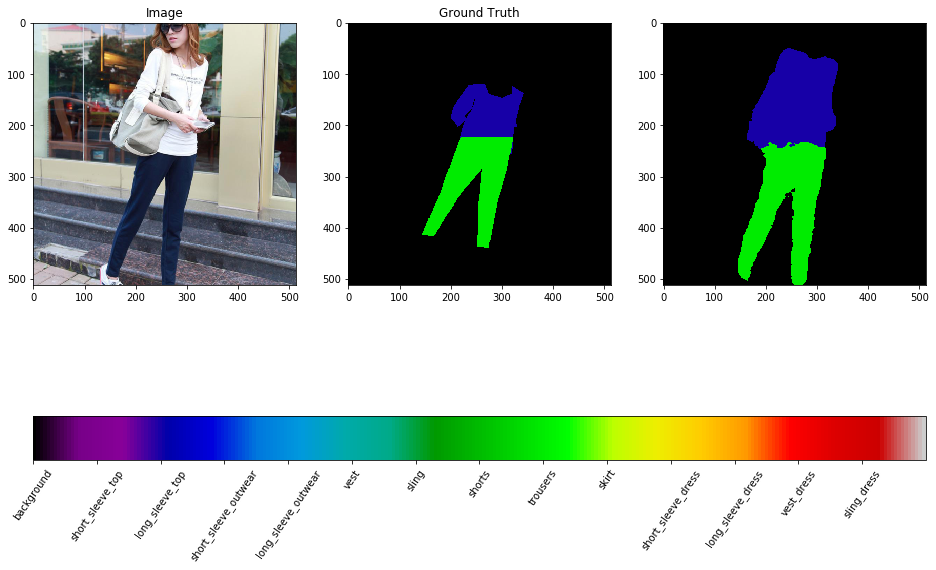

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(16, 16))

images = []

axs[0].set_title("Image")
axs[1].set_title("Ground Truth")

images.append(axs[0].imshow(image.astype(int)))
images.append(axs[1].imshow(annotation, cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=num_classes))
images.append(axs[2].imshow(prediction, cmap=plt.get_cmap('nipy_spectral'), vmin=0, vmax=num_classes))
    
cbar = fig.colorbar(images[2], ax=axs, orientation='horizontal', ticks=[x for x in range(num_classes)], fraction=.1)
cbar.ax.set_xticklabels(list(predictor.categories_dict.keys()), rotation=55)

plt.show()
#plt.savefig("../figures/pred_3.jpg")
#print(dataset['labels'])

In [65]:
#annotation